**TASK 2** Titanic analysis

Load the dataset

In [1]:
import pandas as pd
data = pd.read_csv(r"D:\meena\titanic.csv")
df = pd.DataFrame(data)
df.head()

,pclass,survived,name,gender,age,siblings/spouse abroad,parents/children abroad,ticket,fare,cabin,embarked,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,NaN,NaN,NaN
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,NaN
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,NaN
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,NaN
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,NaN


Clean the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   1309 non-null   float64
 1   survived                 1309 non-null   float64
 2   name                     1309 non-null   object 
 3   gender                   1309 non-null   object 
 4   age                      1046 non-null   float64
 5   siblings/spouse abroad   1309 non-null   float64
 6   parents/children abroad  1309 non-null   float64
 7   ticket                   1309 non-null   object 
 8   fare                     1308 non-null   float64
 9   cabin                    295 non-null    object 
 10  embarked                 1307 non-null   object 
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(9), object(5)

In [3]:
df.isnull().sum()

pclass                        1
survived                      1
name                          1
gender                        1
age                         264
siblings/spouse abroad        1
parents/children abroad       1
ticket                        1
fare                          2
cabin                      1015
embarked                      3
Unnamed: 11                1310
Unnamed: 12                1310
Unnamed: 13                1310
dtype: int64

In [4]:
df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   1309 non-null   float64
 1   survived                 1309 non-null   float64
 2   name                     1309 non-null   object 
 3   gender                   1309 non-null   object 
 4   age                      1046 non-null   float64
 5   siblings/spouse abroad   1309 non-null   float64
 6   parents/children abroad  1309 non-null   float64
 7   ticket                   1309 non-null   object 
 8   fare                     1308 non-null   float64
 9   cabin                    295 non-null    object 
 10  embarked                 1307 non-null   object 
dtypes: float64(6), object(5)
memory usage: 112.7+ KB


In [6]:
df['age'].fillna(df['age'].median())
df['age'].isnull().sum()


0

In [9]:
df['fare'].fillna(df['fare'].median(), inplace=True)
df['fare'].isnull().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3532\91202630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True)


0

In [11]:
df['embarked'].fillna(df['embarked'].mode()[0])
df['embarked'].isnull().sum()


0

In [12]:
df = df.drop(columns=['cabin'])
df.isnull().sum()

pclass                     1
survived                   1
name                       1
gender                     1
age                        0
siblings/spouse abroad     1
parents/children abroad    1
ticket                     1
fare                       0
embarked                   0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()


pclass                     0
survived                   0
name                       0
gender                     0
age                        0
siblings/spouse abroad     0
parents/children abroad    0
ticket                     0
fare                       0
embarked                   0
dtype: int64

Analysis Questions

In [17]:
#who survived more
df.groupby('gender')['survived'].mean()

gender
female    0.727468
male      0.190985
Name: survived, dtype: float64

women survived more than men

In [20]:
#did passenger class affect survival chances
df.groupby('pclass')['survived'].mean()


pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64

passenger class affected

Survival rate by age group

In [22]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child','Teen','Adult','Middle-aged','Senior']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

df.groupby('AgeGroup')['survived'].mean()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3532\1800539223.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['survived'].mean()


AgeGroup
Child          0.574468
Teen           0.414141
Adult          0.350126
Middle-aged    0.411765
Senior         0.242424
Name: survived, dtype: float64

Visualization

In [14]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'siblings/spouse abroad',
       'parents/children abroad', 'ticket', 'fare', 'embarked'],
      dtype='object')

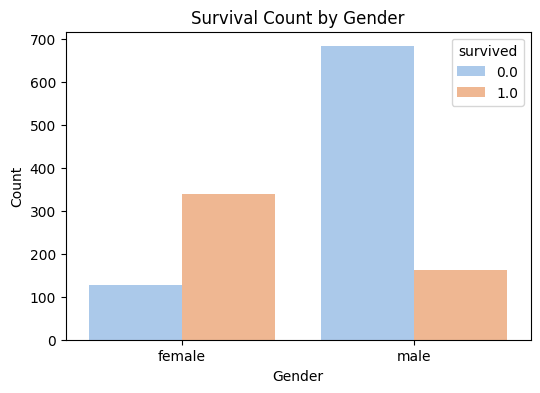

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

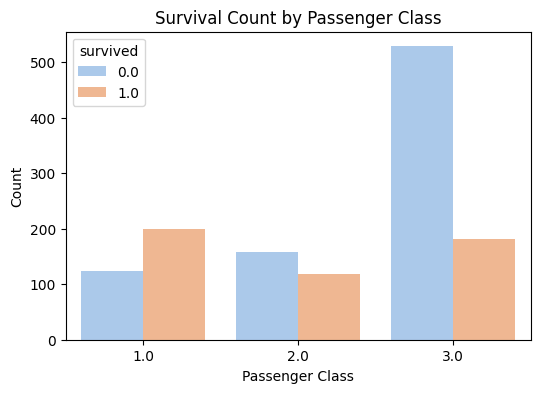

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pclass', hue='survived', palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

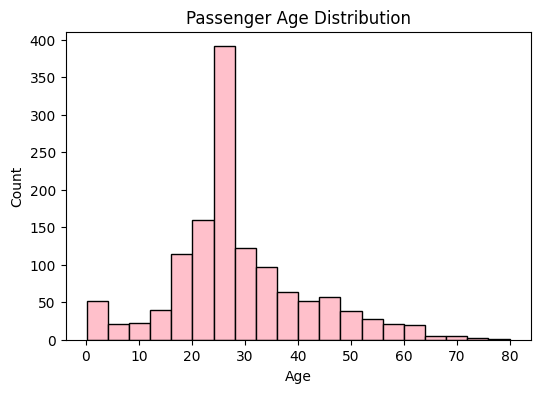

In [27]:
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=20, color='pink', edgecolor='black')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()